# Data Pipeline

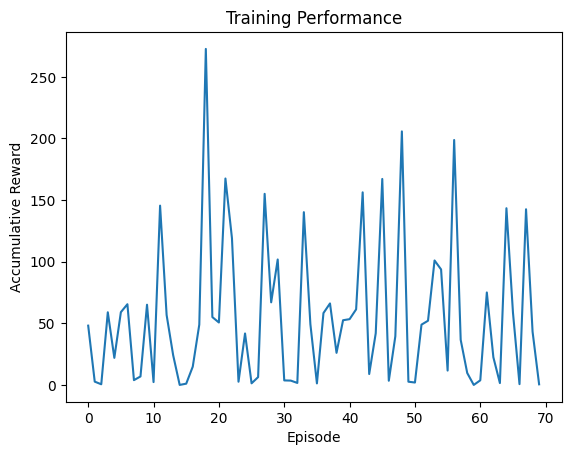

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
# Specify the path to your CSV file
file_path = './models/sac/data/train/step.csv'

# Read the CSV file
df = pd.read_csv(file_path)
plt.plot(df['Episode'], df['Accumulative Reward'])

# Customize the plot
plt.title('Training Performance')
plt.xlabel('Episode')
plt.ylabel('Accumulative Reward')

# Show the plot
plt.show()